# Transient 1D Heat Conduction

In [181]:
import sympy as smp

from sympy import * 

# from sympy import symbols, Eq, Function, dsolve, lambdify, exp, cos, sin
from sympy.calculus.util import periodicity
import numpy as np


import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [182]:
smp.init_printing(pretty_print=True)

In [183]:
# starting from basically the solution ..
x, tau = symbols("X tau")
theta = symbols("θ", cls=Function)(x, tau)
theta


In [184]:
# Bi = 2
lam, A, B, Bi = symbols("lambda A B, Bi")
lam = symbols("lambda", real=True, positive=True)
lam
Bi

In [185]:
sol = exp(-lam**2*tau) * (A*cos(lam*x) + B*sin(lam*x))
gen_eq = Eq(theta, sol )
gen_eq

In [186]:
bc1_eq = Eq(gen_eq.rhs.diff(x).subs(x,0), 0)
# bc1_sol = bc1_eq
B_solve = smp.solve(bc1_eq, B)[0]
B_solve

In [187]:
gen_eq2 = Eq(theta, gen_eq.rhs.subs(B, B_solve))
gen_eq2

In [188]:
bc2_eq = Eq(gen_eq2.rhs.diff(x).subs(x,1), -Bi*gen_eq2.rhs.subs(x,1))
bc2_eq 

In [261]:
Bi_solve = smp.solve(bc2_eq, Bi, domain=smp.S.Reals)[0]
Bi_solve # has infinite values... 

In [245]:
# short cut
lam_n = Indexed("lambda", n)
A_n = Indexed("A", n)
A_n

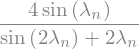

In [246]:
An_sol = (4*sin(lam_n))/(2*lam_n + sin(2*lam_n))
An_sol

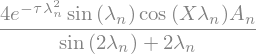

In [250]:
spec_sol = gen_eq2.rhs.subs([(lam, lam_n), (A, A_n)])*An_sol
spec_sol

In [263]:
Bi_eq = Eq(Bi, Bi_solve.subs(lam, lam_n))
Bi_eq

In [273]:
solveset(Eq(Bi, Bi_solve), lam)

In [267]:
Bi_vals = np.linspace(0.1, 1, 10)
Bi_vals

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [269]:
fBi = lambdify(lam, Bi_solve )
fBi

<function _lambdifygenerated(lambda_)>

In [271]:
fBi(0.1)

In [235]:

# # solution is a linear combination of thetas...
# index_eq = gen_eq2.rhs.subs([(lam, Indexed("lambda", n)),
#         (A, Indexed("A", n))])
# # gen_eq3 = Eq(theta, Sum(), 
# #         (n, 1, 10)))
# # gen_eq3
# index_eq# Sum(gen_eq2.rhs.subs(lam, Indexed("lambda", n)), (n, 1, 3))#.doit()